## Challenge: Single & Multiple Linear Regression
E. Thompson


### Task 1 - Single Linear Regression
1. Import insurance.csv into a notebook

2. Use the data in the relevant columns to determine how age affects insurance costs:
- Plot a scatter plot with age on the x-axis and charges on the y-axis.
- Using linear_model.LinearRegression() from sklearn, fit a model to your data and make predictions.
- Plot another scatter plot with the best-fit line.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
%matplotlib inline

In [3]:
# Import insurance data:
ins_data = pd.read_csv('insurance.csv')
ins_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Scatter plot showing age vs charges:

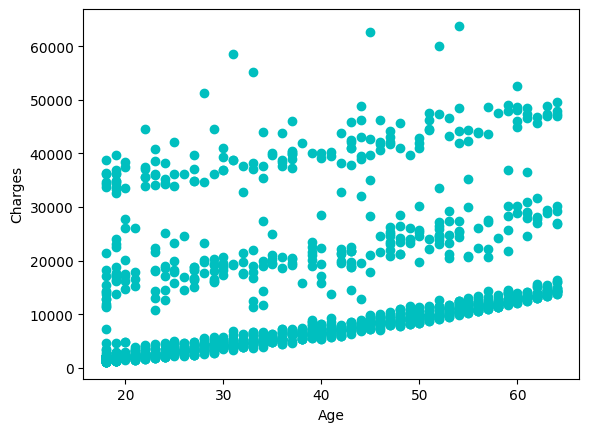

In [4]:
x = ins_data.iloc[:,0].values
y = ins_data.iloc[:,-1].values

plt.scatter(x, y, color='c')
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()

Fitting a model to the data:

In [5]:
# Reshape x into a 2D array (n_samples, n_features) for use in the model:
x = x.reshape(-1, 1)

charge_model = LinearRegression()
charge_model.fit(x, y)

LinearRegression()

Plot of the data and model (line of best fit):

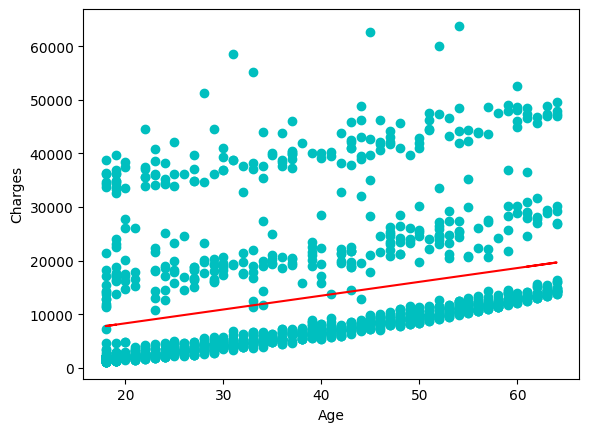

In [6]:
y_pred = charge_model.predict(x)

plt.scatter(x, y, color='c')
plt.plot(x, y_pred, color = 'r')
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()

Making a prediction of the charges for a 75 year old:

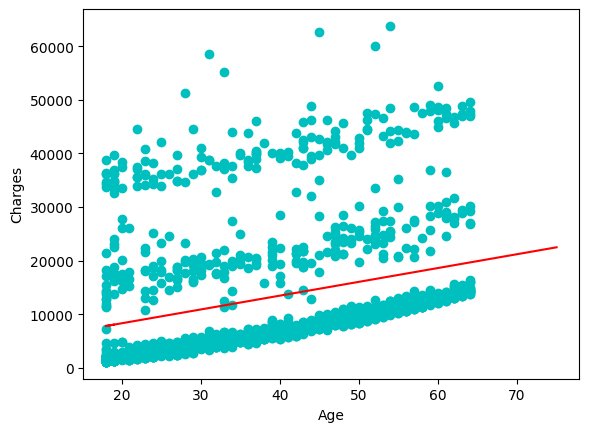

The charges for a 75 year old should be [22495.08140608]


In [7]:
unk_x = [[75]]

x_pred = np.append(x, unk_x).reshape(-1, 1)
y_pred = charge_model.predict(x_pred)

plt.scatter(x, y, color='c')
plt.plot(x_pred, y_pred, color = 'r')
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()

print(f"The charges for a 75 year old should be {charge_model.predict(unk_x)}")


Although I have used a simple linear regression as required by the challenge, I do not think that the model is a very good fit. There look to be 3 bands for the charges, which suggests that perhaps it would be better if more features were taken into account when making predictions.

### Task 2 - Multiple Linear Regression
- Use the diabetes dataset to predict a person's progression in the condition with respect to various attributes about them.

In [8]:
# Import the dataset:
from sklearn.datasets import load_diabetes

data = load_diabetes(as_frame=True).data
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [9]:
target = load_diabetes(as_frame=True).target
target.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

#### Fitting the data to a model:

1. Differentiate between the independent variables and the dependent variable and assign them to x and y.

In [10]:
# NB: The data has already been scaled

x = data.values
y = target.values

# Checking x and y are in a 2D array of size (n_samples, n_features):
print(x.shape)
print(y.shape)

(442, 10)
(442,)


2. Generate training and test sets comprising 80% and 20% of the data respectively:

In [96]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)
# NB: Not shuffling gave a better R2 than shuffling with various random states, and allows the results to be reproduced.

print ("Training data:", x_train.shape, y_train.shape)
print ("Test data:", x_test.shape, y_test.shape)

Training data: (353, 10) (353,)
Test data: (89, 10) (89,)


3. Generate a multiple linear regression model using the training set. Use all of the independent variables.

In [97]:
lm = LinearRegression()
diabetes_model = lm.fit(x_train, y_train)


4. Print out the intercept and coefficents of the trained model.

In [98]:
print('Intercept: ', diabetes_model.intercept_)
print('Coefficients: ', diabetes_model.coef_)

Intercept:  152.05480142355657
Coefficients:  [  -8.07364906 -248.84853038  513.85547734  293.67517518 -475.56587666
  213.09753247  -33.61911027  147.19049654  639.10444413   86.33938681]


5. Generate predictions for the test set

In [99]:
y_predictions = lm.predict(x_test)
print(y_predictions[0:5])

[170.68002944 193.84573224 132.55729187  91.84217797 199.39503269]


Plotting the residuals in order to check that there is no pattern present:

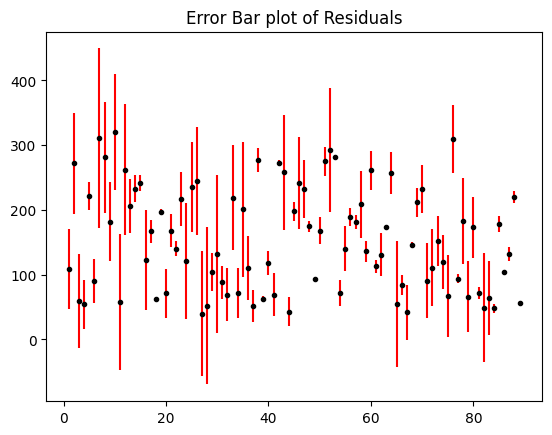

In [100]:
# Method 1: Plotting the residuals as error bars
residuals = np.abs(y_test - y_predictions)

plt.errorbar(range(1, 90), np.squeeze(y_test), yerr=np.squeeze(residuals), fmt='.k', ecolor="red")
plt.title('Error Bar plot of Residuals')
plt.show()

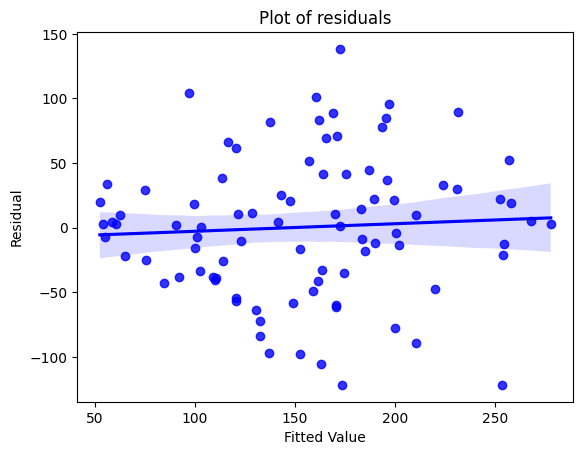

In [101]:
# Method 2: Plotting as a scatter plot of residuals vs fitted values.
residuals = y_test - y_predictions

fig = sns.regplot(x=y_predictions, y=residuals, color='blue'
                  ).set(title='Plot of residuals', xlabel='Fitted Value', ylabel='Residual')

The residuals look to be randomly scattered around zero, with no clear patterns. This suggests that the independent variables used describe the relationship well enough that only random error remains.

6. Compute the r2-score for the model on the test set.

In [102]:
print ("R2 Score: ", diabetes_model.score(x_test, y_test))

R2 Score:  0.5437558023550997


An R2 score of 0.54 may be acceptable, depending on the context. It indicates that 54% of the variability in the outcome data can be explained by the model, while 46% cannot.